# 《Python 大战机器学习》第 2 章决策树笔记

In [1]:
import numpy as np

np.random.seed(0)

In [2]:
n = 100
X = 5 * np.random.randn(n, 1)

In [3]:
y = np.sin(X).ravel()

In [4]:
noise_num = (int)(n / 5)

In [5]:
noise_num

20

In [6]:
y[::5] += 3 * (0.5 - np.random.rand(noise_num))

In [7]:
np.random.rand(noise_num)

array([0.80619399, 0.70388858, 0.10022689, 0.91948261, 0.7142413 ,
       0.99884701, 0.1494483 , 0.86812606, 0.16249293, 0.61555956,
       0.12381998, 0.84800823, 0.80731896, 0.56910074, 0.4071833 ,
       0.069167  , 0.69742877, 0.45354268, 0.7220556 , 0.86638233])

## 回归决策树

In [8]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=1)

In [9]:
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
print('训练数据集评分 {}'.format(regr.score(X_train, y_train)))
print('测试数据集评分 {}'.format(regr.score(X_test, y_test)))

训练数据集评分 1.0
测试数据集评分 0.6717388954085812


### 绘图

In [10]:
from dt_regressor import create_data
from dt_regressor import test_DecisionTreeRegressor

X_train, X_test, y_train, y_test = create_data(100)

训练数据集评分 0.9999999999801908
测试数据集评分 0.7891068670888406


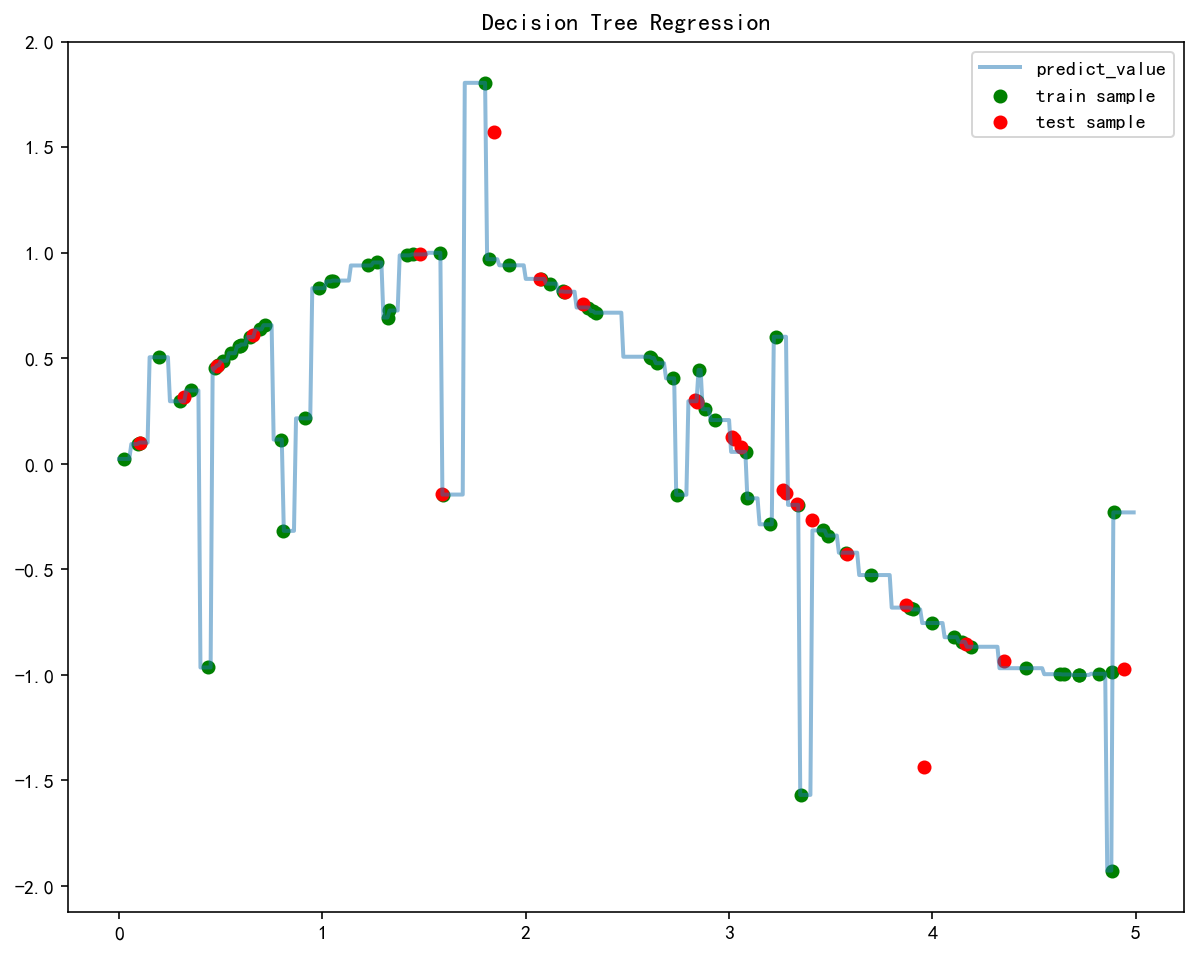

In [11]:
test_DecisionTreeRegressor(X_train, X_test, y_train, y_test)

可以看到：训练样本的拟合相当好，但是对于测试样本的拟合就差强人意。

### 检验随机划分与最优划分的影响

In [12]:
from dt_regressor import test_DecisionTreeRegressor_splitter

test_DecisionTreeRegressor_splitter(X_train, X_test, y_train, y_test)

splitter:best
训练数据集评分 0.9999999999801908
测试数据集评分 0.7891068670888406
splitter:random
训练数据集评分 0.9999999999801908
测试数据集评分 0.6417960292959979


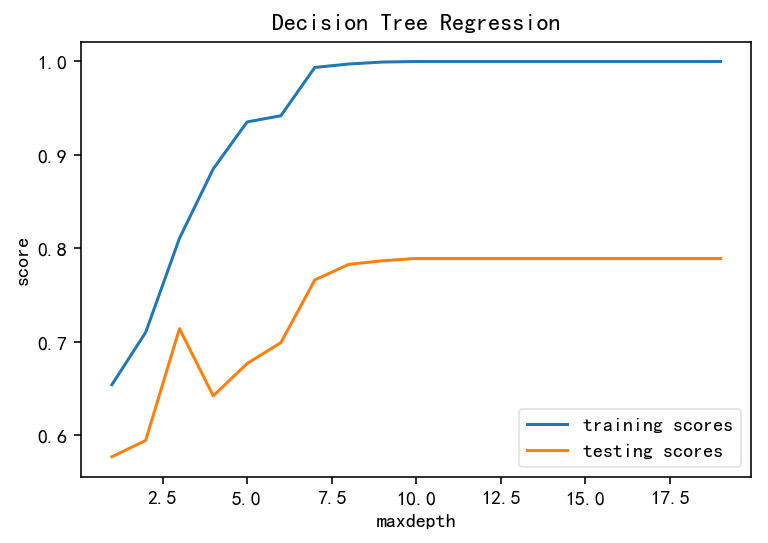

In [13]:
from dt_regressor import test_DecisionTreeRegressor_depth

test_DecisionTreeRegressor_depth(
    X_train, X_test, y_train, y_test, max_depth=20)

+ 深度越小的决策树越简单，它将特征空间划分的折线越少
+ 深度越深的决策树越复杂，它将特征空间划分的折线越多（曲线越曲折）

## 决策树分类

In [14]:
from dt_classifier import load_data
from dt_classifier import test_decision_tree_classifier

X_train, X_test, y_train, y_test = load_data()
test_decision_tree_classifier(X_train, X_test, y_train, y_test)

训练数据集评分 1.0
测试数据集评分 0.9736842105263158


In [15]:
from dt_classifier import test_decision_tree_classifier_criterion

test_decision_tree_classifier_criterion(X_train, X_test, y_train, y_test)

criterion entropy
训练数据集评分 1.0
测试数据集评分 0.9473684210526315
criterion gini
训练数据集评分 1.0
测试数据集评分 0.9736842105263158


+ 可以看到使用基尼系数的策略预测性能较高。

In [16]:
from dt_classifier import test_decision_tree_classifier_splitter

test_decision_tree_classifier_splitter(X_train, X_test, y_train, y_test)

splitter best
训练数据集评分 1.0
测试数据集评分 0.9736842105263158
splitter random
训练数据集评分 1.0
测试数据集评分 0.9736842105263158


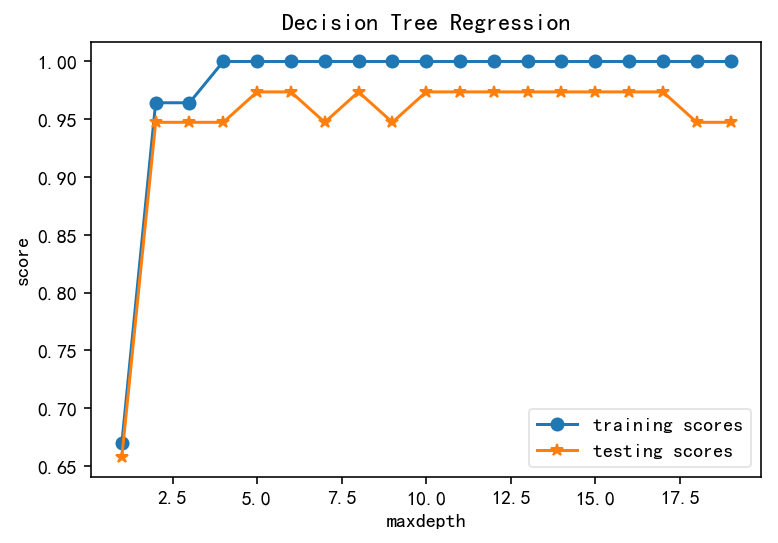

In [17]:
from dt_classifier import test_decision_tree_classifier_depth

test_decision_tree_classifier_depth(
    X_train, X_test, y_train, y_test, max_depth=20)